In [76]:
import pandas as pd
data = pd.read_csv('/content/twitter_validation.csv',names=['Id','Entity','Sentiment','Tweet'],header=None)
data.head()

,Id,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [77]:
def encodei(text):
    if isinstance(text,str):
        return text.encode('latin1').decode('utf-8')
    return text

In [78]:
import re
def preprocess(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
        text = re.sub(r"@\w+", '', text)                     # Remove mentions
        text = re.sub(r"[^a-zA-Z\s]", '', text)               # Remove non-letters
        text = text.lower()
    return text

In [79]:
data['Clean_tweet'] = data['Tweet'].apply(preprocess)

In [80]:
from textblob import TextBlob
data['Polarity'] = data['Clean_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity if isinstance(x,str) else 0)
data['Predicted_sentiment'] = data['Polarity'].apply(lambda x: 'Positive' if x>0 else ('Negative' if x<0 else 'Neutral'))

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

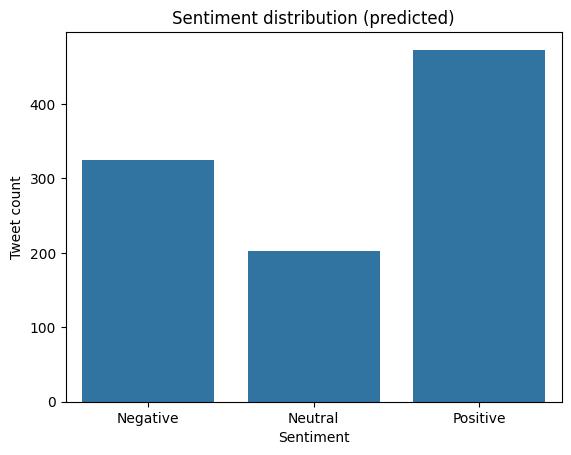

In [82]:
sns.countplot(x='Predicted_sentiment',data=data)
plt.title('Sentiment distribution (predicted)')
plt.xlabel('Sentiment')
plt.ylabel('Tweet count')
plt.show()

In [83]:
positive_text = ' '.join(data[data['Predicted_sentiment'] == 'Positive']['Clean_tweet'].dropna())
negative_text = ' '.join(data[data['Predicted_sentiment'] == 'Negative']['Clean_tweet'].dropna())

In [85]:
from wordcloud import WordCloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

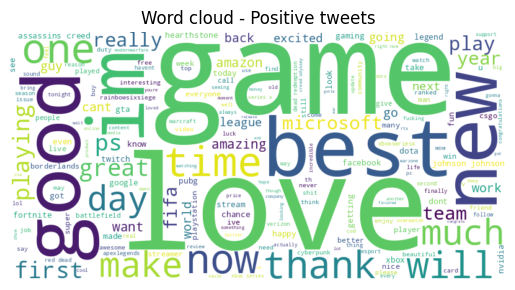

In [86]:
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.title('Word cloud - Positive tweets')
plt.axis('off')
plt.show()

In [52]:
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

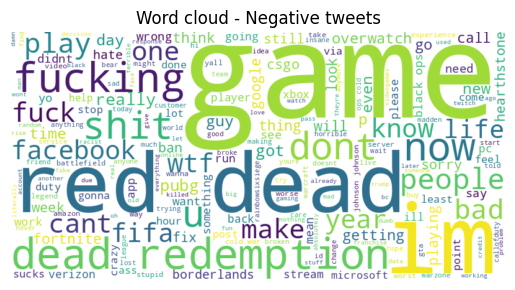

In [87]:
plt.imshow(wordcloud_negative,interpolation='bilinear')
plt.title('Word cloud - Negative tweets')
plt.axis('off')
plt.show()

In [88]:
top_entities_sentiment = data.groupby(['Entity', 'Predicted_sentiment']).size().unstack().fillna(0)

In [89]:
top_entities_sentiment = top_entities_sentiment.sum(axis=1).sort_values(ascending=False).head(10)

<ipython-input-90-80eace3139c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


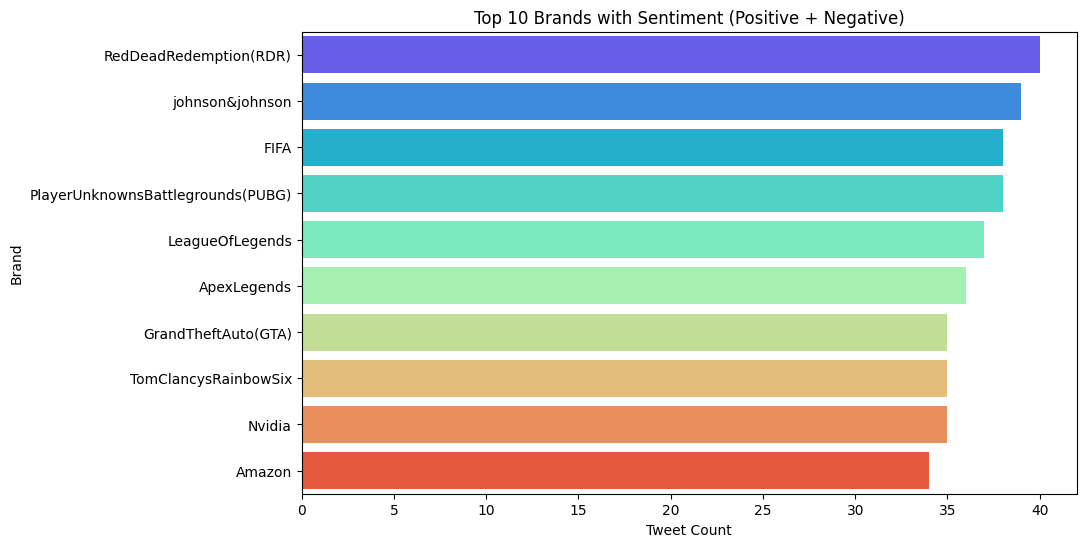

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_entities_sentiment.values,
    y=top_entities_sentiment.index,
    palette='rainbow'
)
plt.title('Top 10 Brands with Sentiment (Positive + Negative)')
plt.xlabel('Tweet Count')
plt.ylabel('Brand')
plt.show()
